<a href="https://colab.research.google.com/github/ngolemai020405/Tuan5/blob/main/Tuan5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

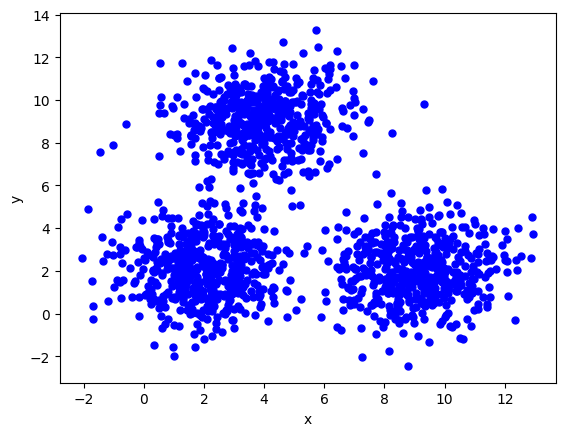

Init centers:
 [[6.01274134 0.99673225]
 [1.95402581 9.56313609]
 [3.42658541 7.26270433]]


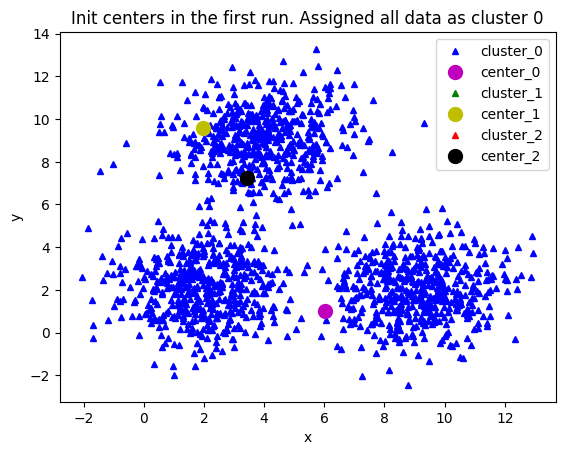

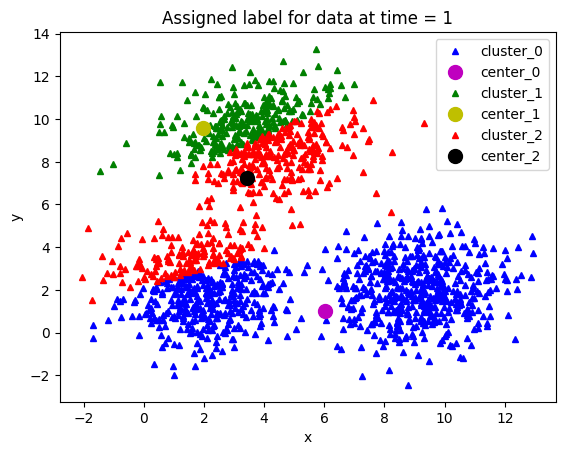

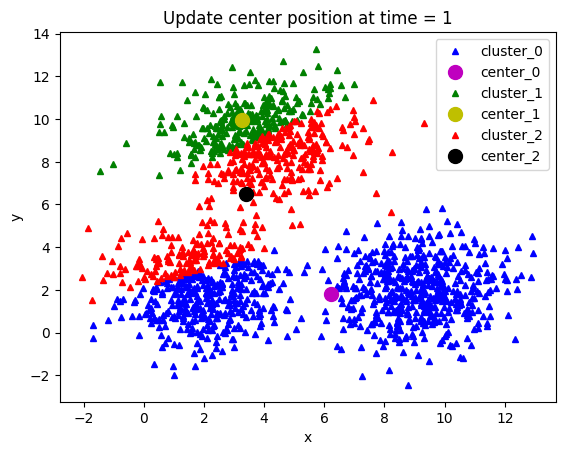

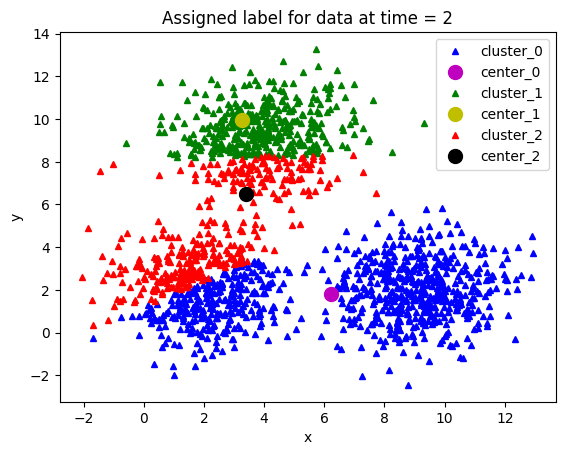

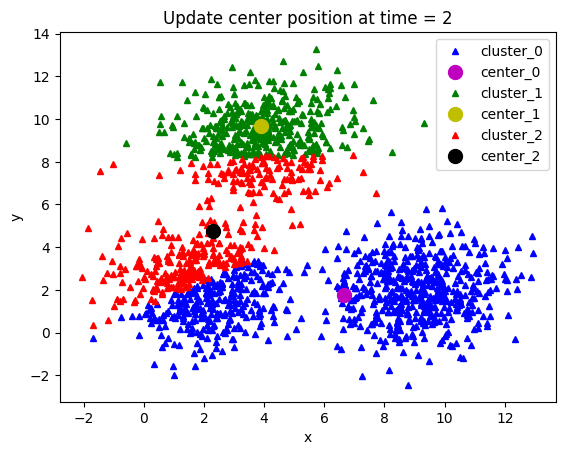

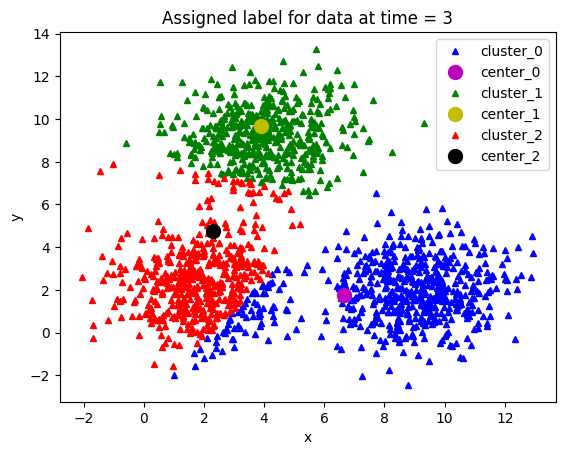

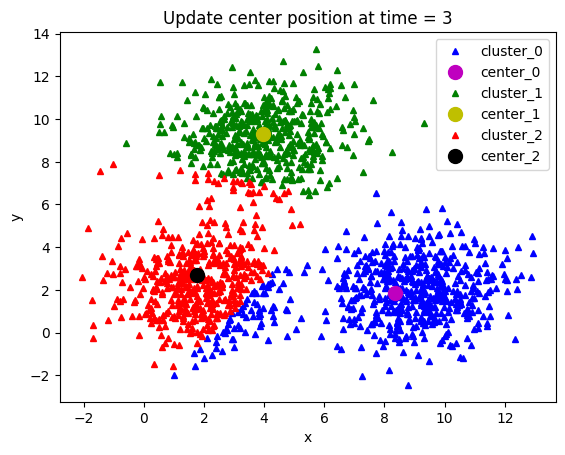

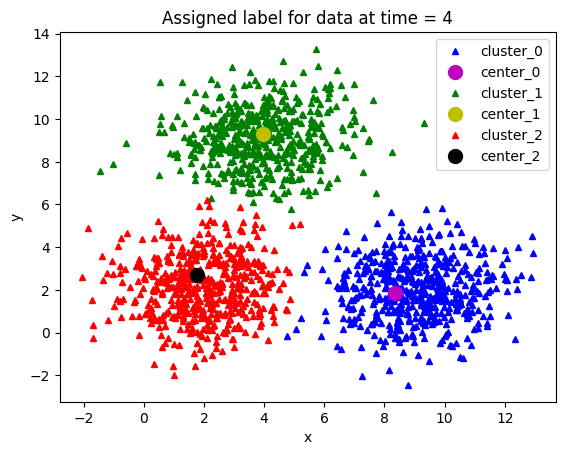

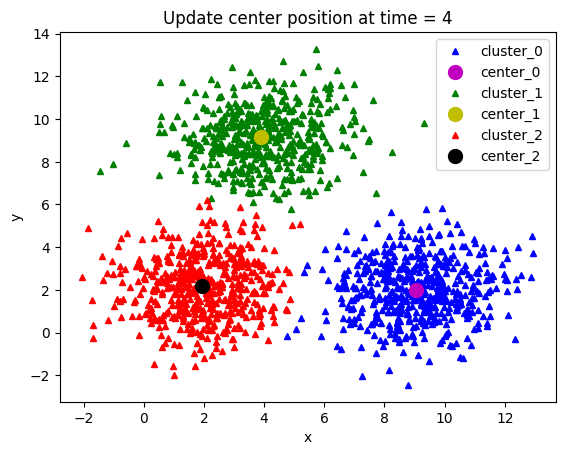

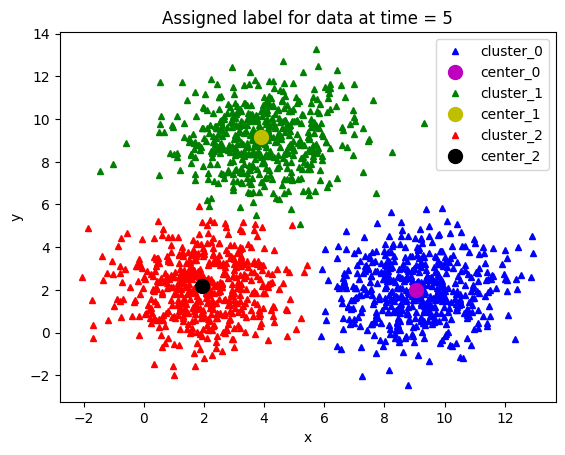

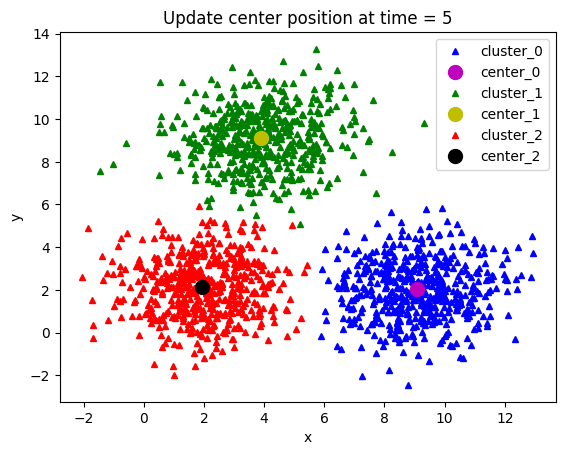

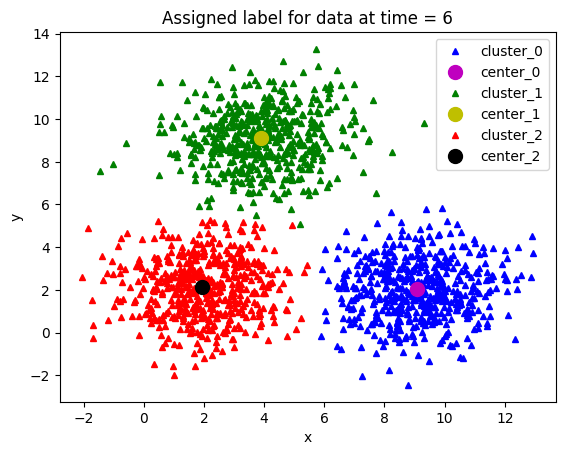

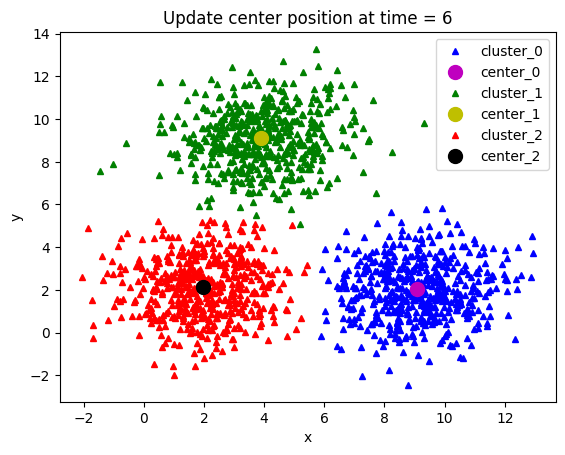

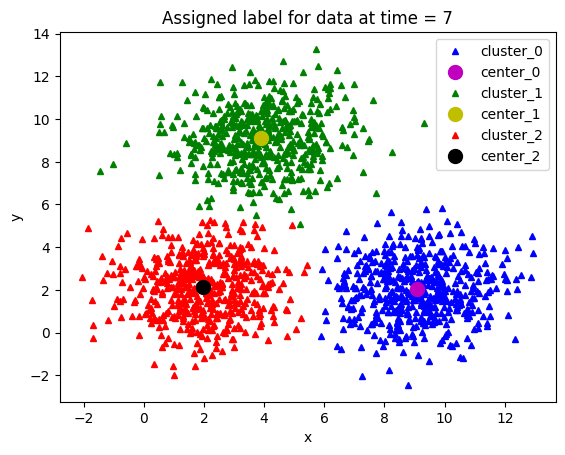

Done! Kmeans has converged after 6 iterations
Final centers:
 [[9.07278289 2.02275727]
 [3.89915848 9.10286417]
 [1.9500852  2.11954216]]


In [4]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

means = [[2, 2], [9, 2], [4, 9]]
cov = [[2, 0], [0, 2]]
n_samples = 500
n_cluster = 3

X0 = np.random.multivariate_normal(means[0], cov, n_samples)
X1 = np.random.multivariate_normal(means[1], cov, n_samples)
X2 = np.random.multivariate_normal(means[2], cov, n_samples)
X = np.concatenate((X0, X1, X2), axis=0)

plt.xlabel('x')
plt.ylabel('y')
plt.plot(X[:, 0], X[:, 1], 'bo', markersize=5)
plt.show()

def kmeans_init_centers(X, n_cluster):
    return X[np.random.choice(X.shape[0], n_cluster, replace=False)]

def kmeans_predict_labels(X, centers):
    D = cdist(X, centers)
    return np.argmin(D, axis=1)

def kmeans_update_centers(X, labels, n_cluster):
    centers = np.zeros((n_cluster, X.shape[1]))
    for k in range(n_cluster):
        Xk = X[labels == k, :]
        centers[k, :] = np.mean(Xk, axis=0)
    return centers

def kmeans_has_converged(centers, new_centers):
    return set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers])

def kmeans_visualize(X, centers, labels, n_cluster, title):
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)

    plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

    for i in range(n_cluster):
        data = X[labels == i]
        plt.plot(data[:, 0], data[:, 1], plt_colors[i] + '^',
                 markersize=4, label='cluster_' + str(i))
        plt.plot(centers[i][0], centers[i][1], plt_colors[i + 4] + 'o',
                 markersize=10, label='center_' + str(i))

    plt.legend()
    plt.show()

def kmeans(init_centers, init_labels, X, n_cluster):
    centers = init_centers
    labels = init_labels
    times = 0

    while True:
        labels = kmeans_predict_labels(X, centers)
        kmeans_visualize(X, centers, labels, n_cluster,
                         'Assigned label for data at time = ' + str(times + 1))

        new_centers = kmeans_update_centers(X, labels, n_cluster)

        if kmeans_has_converged(centers, new_centers):
            break

        centers = new_centers
        kmeans_visualize(X, centers, labels, n_cluster,
                         'Update center position at time = ' + str(times + 1))
        times += 1

    return centers, labels, times

init_centers = kmeans_init_centers(X, n_cluster)
print("Init centers:\n", init_centers)

init_labels = np.zeros(X.shape[0])
kmeans_visualize(X, init_centers, init_labels, n_cluster,
                 'Init centers in the first run. Assigned all data as cluster 0')

centers, labels, times = kmeans(init_centers, init_labels, X, n_cluster)
print('Done! Kmeans has converged after', times, 'iterations')
print('Final centers:\n', centers)


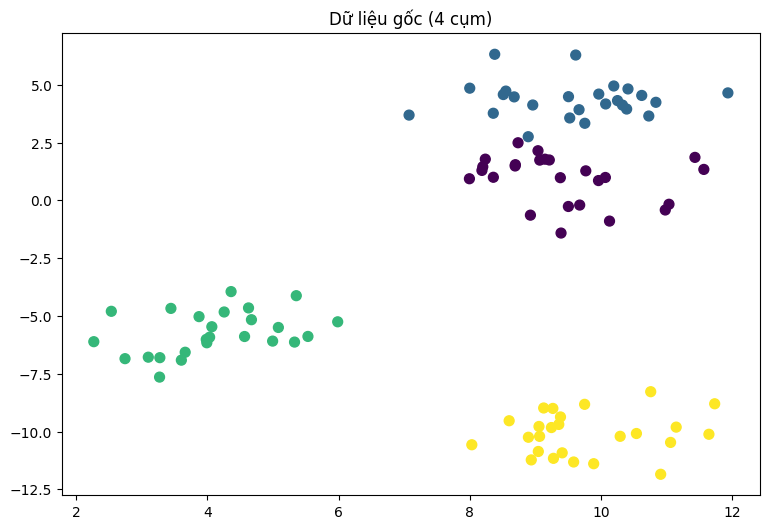

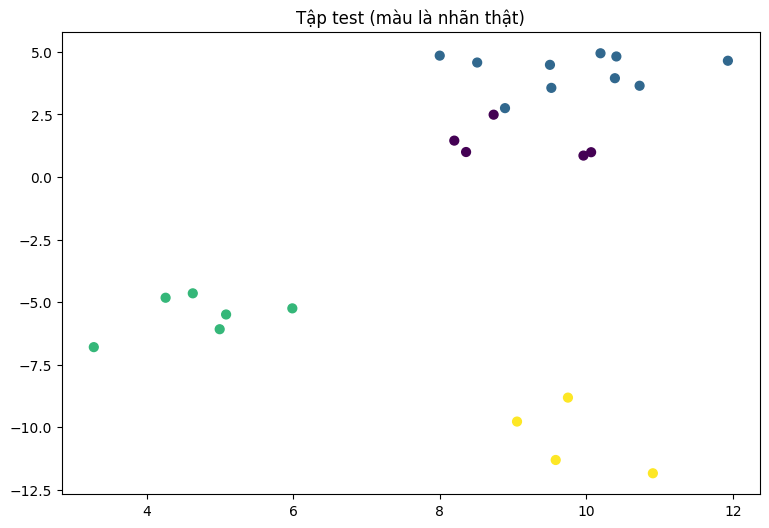

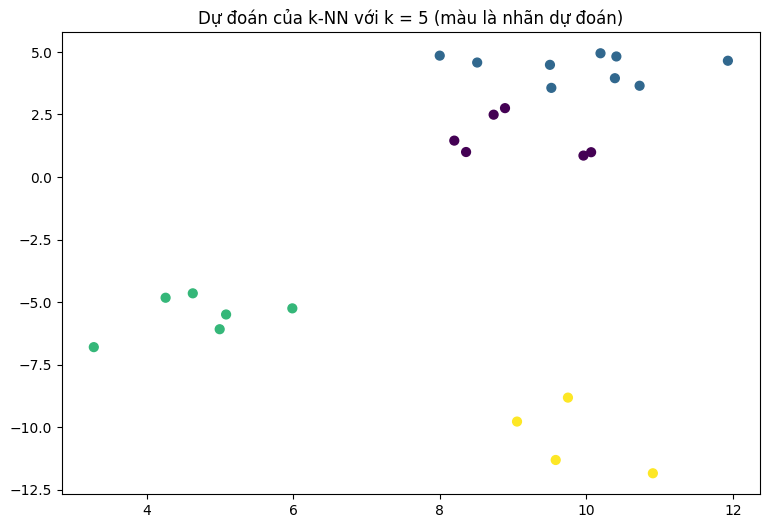

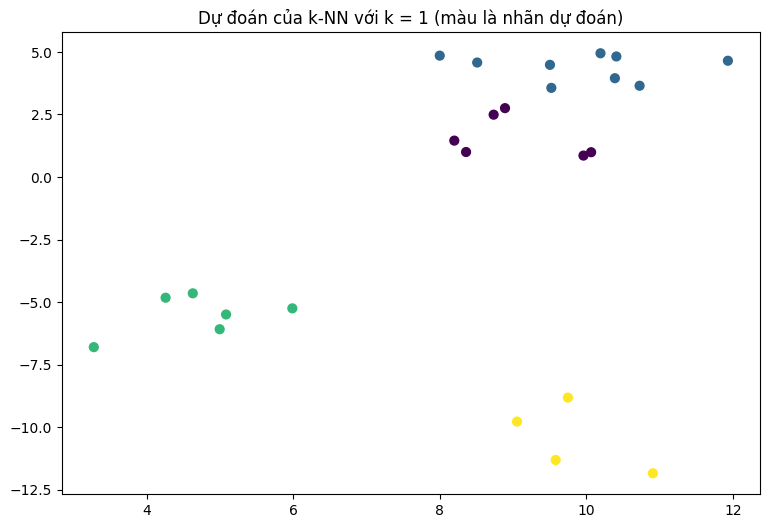

Giá trị k tối ưu (theo CV): {'n_neighbors': np.int64(2)}
Nhãn dự đoán cho điểm [[1 3]] là: [0]


In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


X, y = make_blobs(
    n_samples=100,
    n_features=2,
    centers=4,
    cluster_std=1,
    random_state=4
)

plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', s=50)
plt.title("Dữ liệu gốc (4 cụm)")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

plt.figure(figsize=(9, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', s=40)
plt.title("Tập test (màu là nhãn thật)")
plt.show()

knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
y_pred_5 = knn5.predict(X_test)

plt.figure(figsize=(9, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_5, marker='o', s=40)
plt.title("Dự đoán của k-NN với k = 5 (màu là nhãn dự đoán)")
plt.show()

knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
y_pred_1 = knn1.predict(X_test)

plt.figure(figsize=(9, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_1, marker='o', s=40)
plt.title("Dự đoán của k-NN với k = 1 (màu là nhãn dự đoán)")
plt.show()

knn_grid = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid={'n_neighbors': np.arange(1, 10)},
    cv=5
)
knn_grid.fit(X, y)
print("Giá trị k tối ưu (theo CV):", knn_grid.best_params_)


def KNN(X_train, X_test, y_train, k):
    num_test = X_test.shape[0]
    num_train = X_train.shape[0]

    distances = np.zeros((num_test, num_train))

    for i in range(num_test):
        for j in range(num_train):
            distances[i, j] = np.sqrt(
                np.sum((X_test[i, :] - X_train[j, :]) ** 2)
            )

    results = []

    for i in range(num_test):
        zipped = list(zip(distances[i, :], y_train))
        res = sorted(zipped, key=lambda x: x[0])
        results_topk = res[:k]

        classes = {}
        for _, cls in results_topk:
            cls = int(cls)
            if cls not in classes:
                classes[cls] = 1
            else:
                classes[cls] += 1

        pred_class = max(classes, key=classes.get)
        results.append(pred_class)

    return np.array(results)

X2, y2 = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    random_state=4
)

X_test_point = np.array([[1, 3]])
results = KNN(X2, X_test_point, y2, k=3)
print("Nhãn dự đoán cho điểm", X_test_point, "là:", results)